In [1]:
import sys
sys.path.insert(0, '..')

import os 
cwd = os.getcwd()
if 'notebooks' not in cwd :
    os.chdir('./Exo-Evol/notebooks/')

import numpy as np
import pandas as pd
from python_modules.grid_data_processing_module import load_grid
from python_modules.numerical_tools_module import interpolate_negatives_rowwise
from python_modules.instrument_module import read_filter_docs, get_wl_all_filters, photo_columns
from python_modules.physics_module import diluted_planet
from sklearn.ensemble import RandomForestRegressor
from python_modules.plotting_tools_module import IdentifySpectra
import matplotlib.pyplot as plt
from python_modules.regression_module import MLmodels
from sklearn.metrics import mean_squared_error
import gc

In [11]:
with h5py.File('../../W39_PRISM_data-2/transit_spectra/FIREFLy_transit_spec.h5', "r") as f:
    td = f['transit_depth'][:]
    wl = f['wavelength'][:]
    error = f['transit_depth_uncertainty'][:]
    
df = pd.DataFrame()
df['wl'] = wl
df['depth'] = td
df['error'] = error
df.to_csv('./../data/spectra/transit_spectra/Wasp39b.txt')



In [2]:
ML = MLmodels(n_estimators=1000)
target = 'flux_radius_age_lgb'
model_flux = ML.load_model(target)

loaded example wavelength
Loading ../data/interpolators/nonlinear//flux_radius_age_lgb.pkl
Loaded ../data/interpolators/nonlinear//flux_radius_age_lgb.pkl


loaded example wavelength


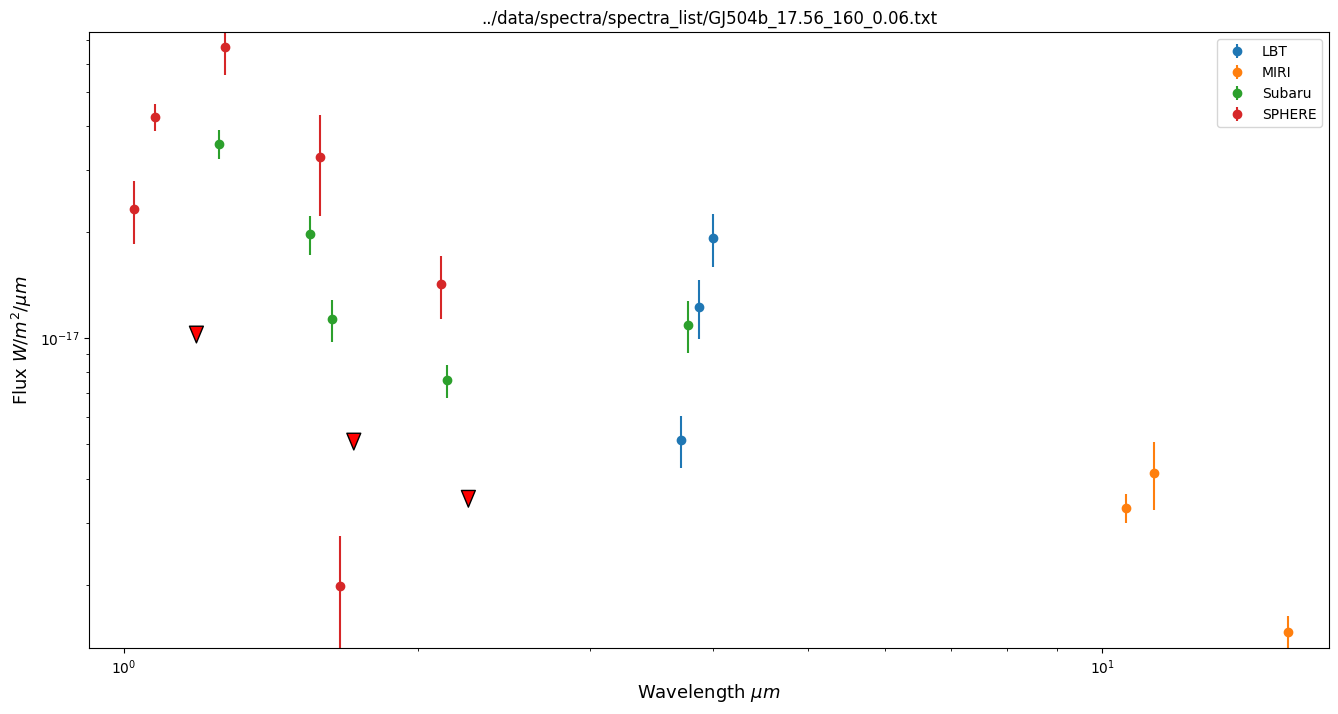

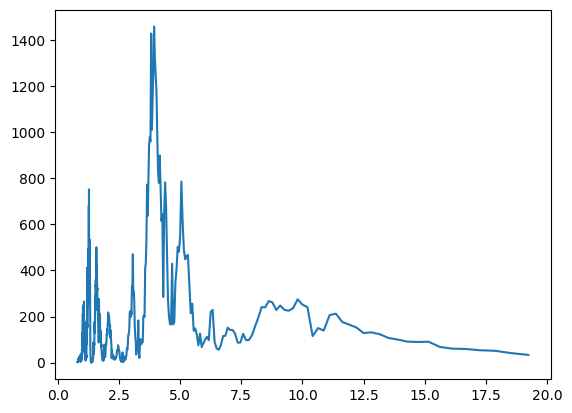

In [6]:
IS = IdentifySpectra(
    planet = 'GJ504b',
    distance_planet = 17.56)
model = ML.use_model(model_flux,np.array([5,50,0,20,500,3,1e9,9]).reshape(1, -1)).reshape(-1, 1)
flux = model[:len(ML.wavelength)]
radius = model[-2]
age = model[-1]
IS.plot_spectrum(added_spectrum=(ML.wavelength,diluted_planet(flux,radius,17.56)))

loaded example wavelength


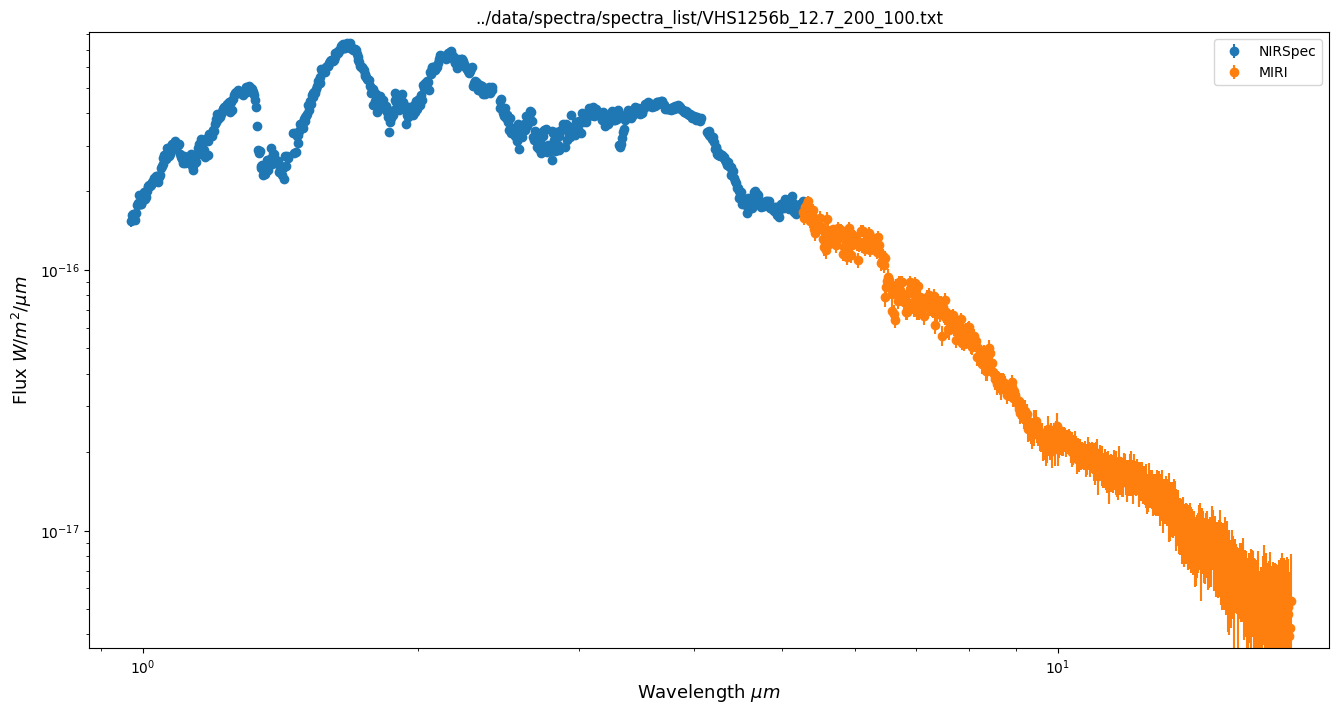

In [3]:
IS = IdentifySpectra(
    planet = 'VHS1256b_JWST',
    distance_planet = 12.7)
IS.plot_spectrum()

loaded example wavelength


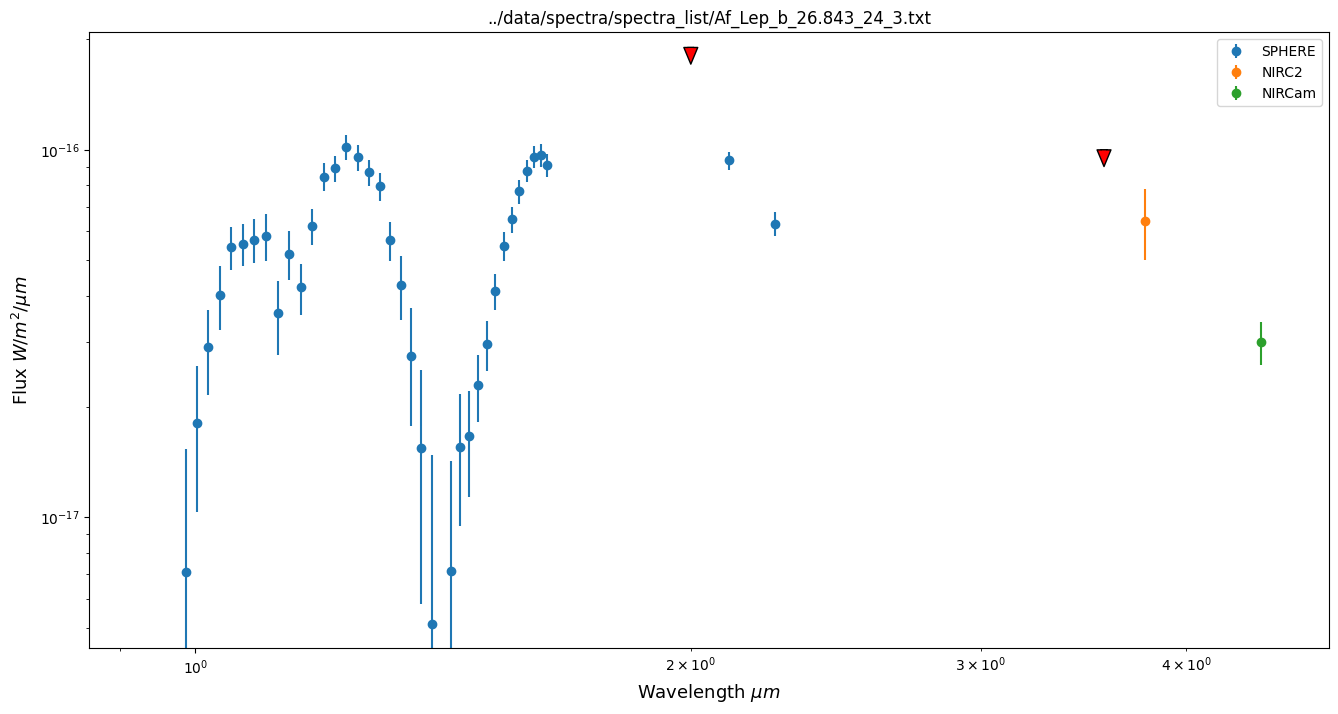

In [4]:
IS = IdentifySpectra(
    planet = 'AF_lep_b',
    distance_planet = 26.843)
IS.plot_spectrum()

loaded example wavelength


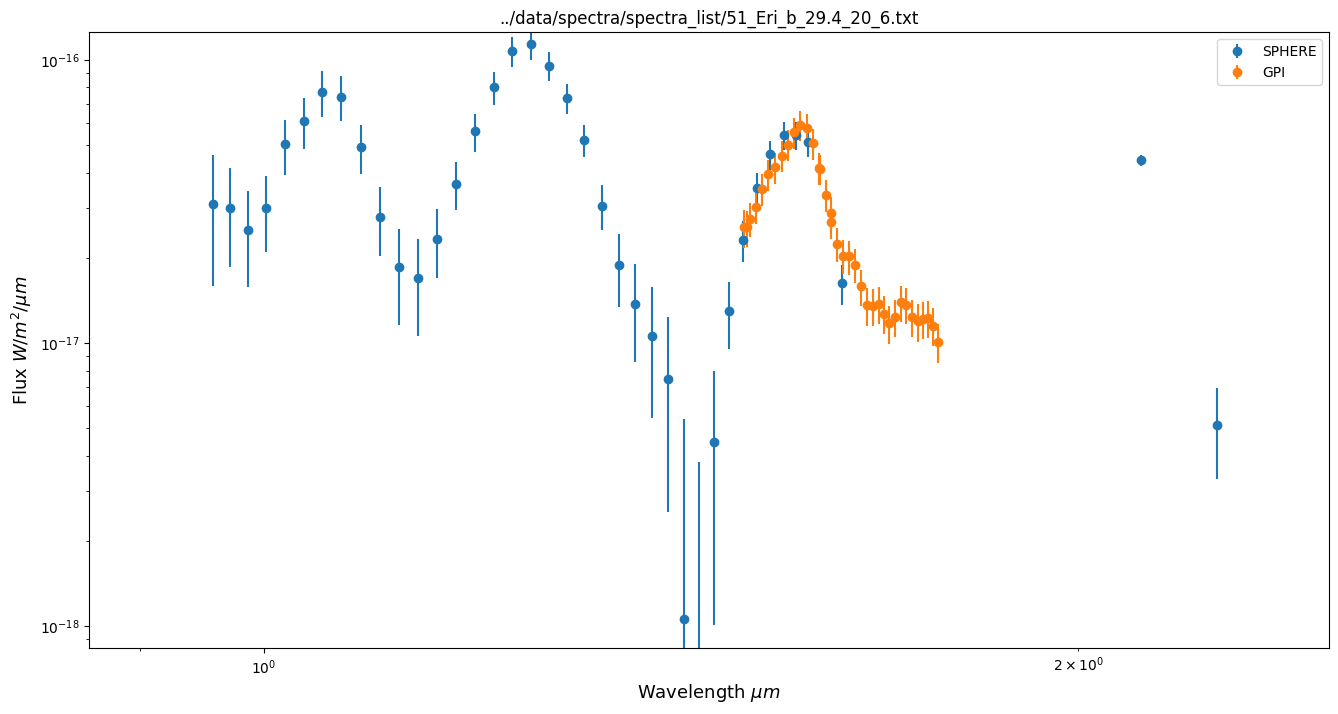

In [5]:
IS = IdentifySpectra(
    planet = '51_Eri_paco',
    distance_planet = 29.4)
IS.plot_spectrum()

loaded example wavelength


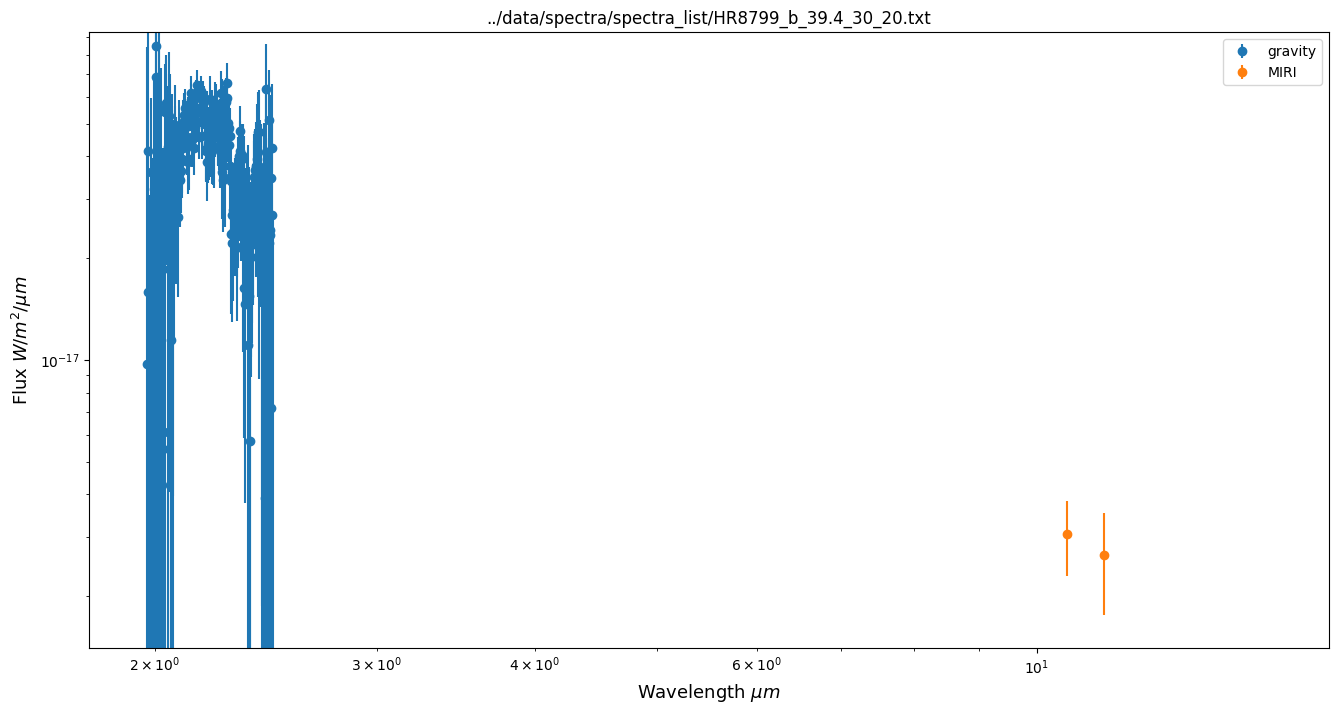

In [6]:
IS = IdentifySpectra(
    planet = 'HR8799_b',
    distance_planet = 39.4)
IS.plot_spectrum()

loaded example wavelength


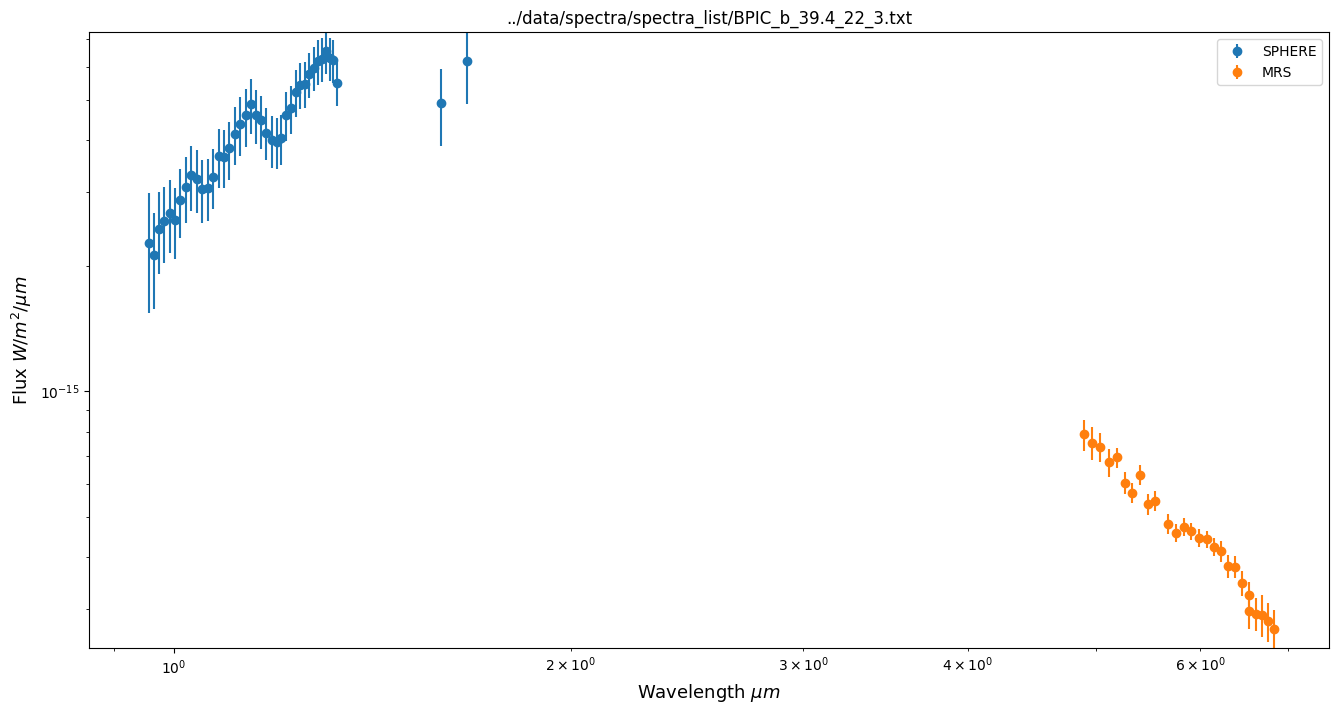

In [7]:
IS = IdentifySpectra(
    planet = 'HR8799_c_2019_11_02_YJH_spectrum_paco_full_GPI_jwst.txt',
    distance_planet = 39.4)
IS.plot_spectrum()

loaded example wavelength


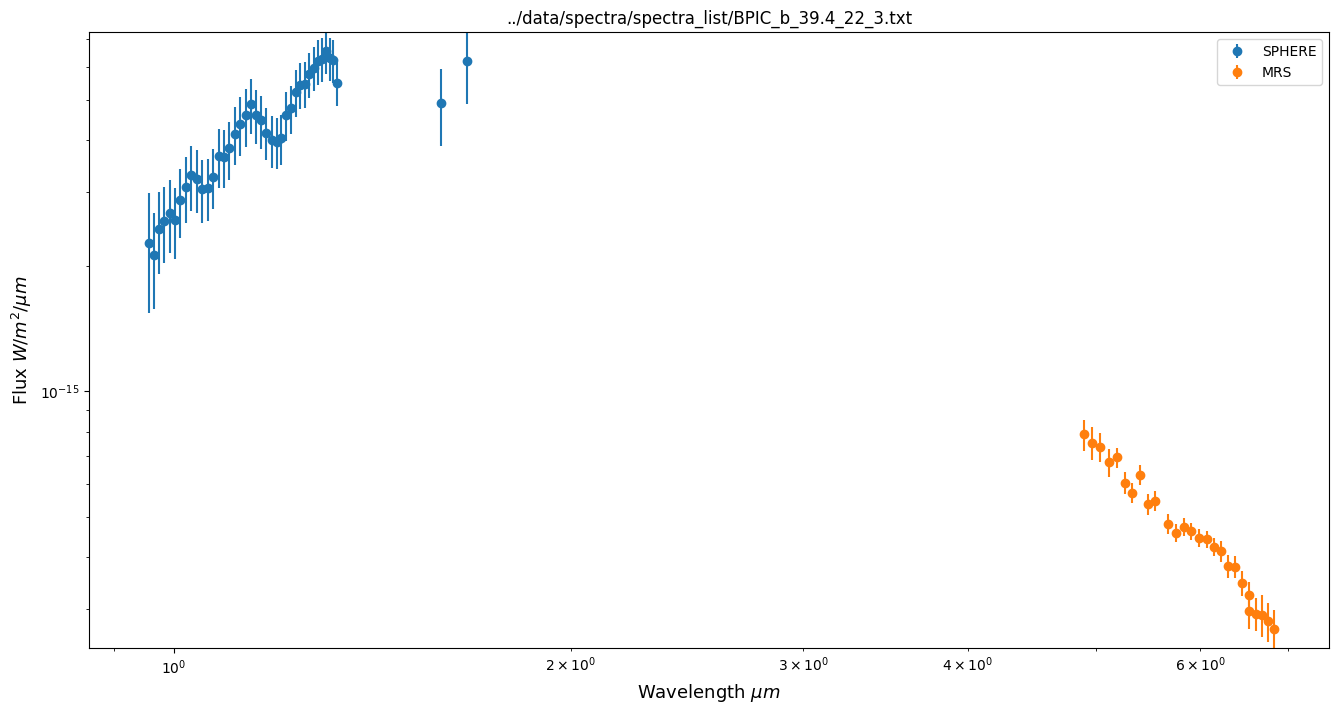

In [8]:
IS = IdentifySpectra(
    planet = 'HR8799_d_2019_11_02_YJH_spectrum_paco_full_GPI_jwst.txt',
    distance_planet = 39.4)
IS.plot_spectrum()

loaded example wavelength


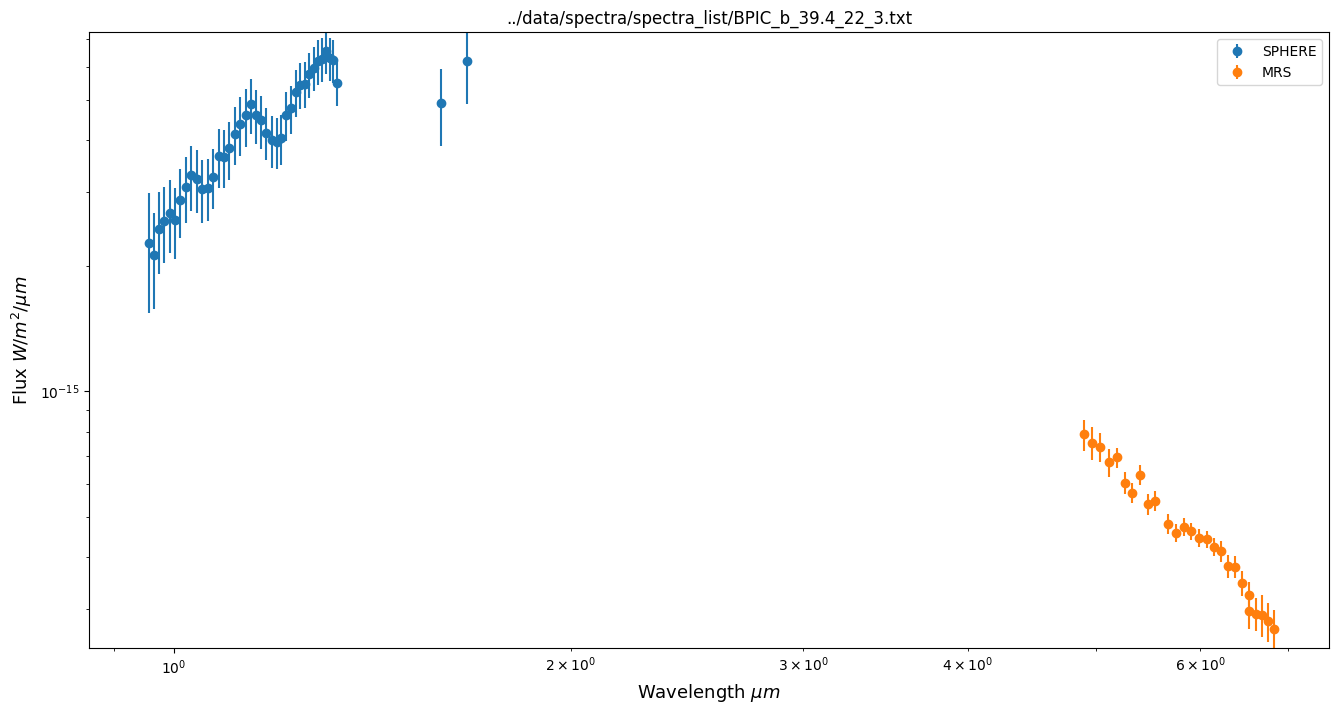

In [9]:
IS = IdentifySpectra(
    planet = 'HR8799_e_2019_11_02_YJH_spectrum_paco_full_GPI_jwst.txt',
    distance_planet = 39.4)
IS.plot_spectrum()

loaded example wavelength


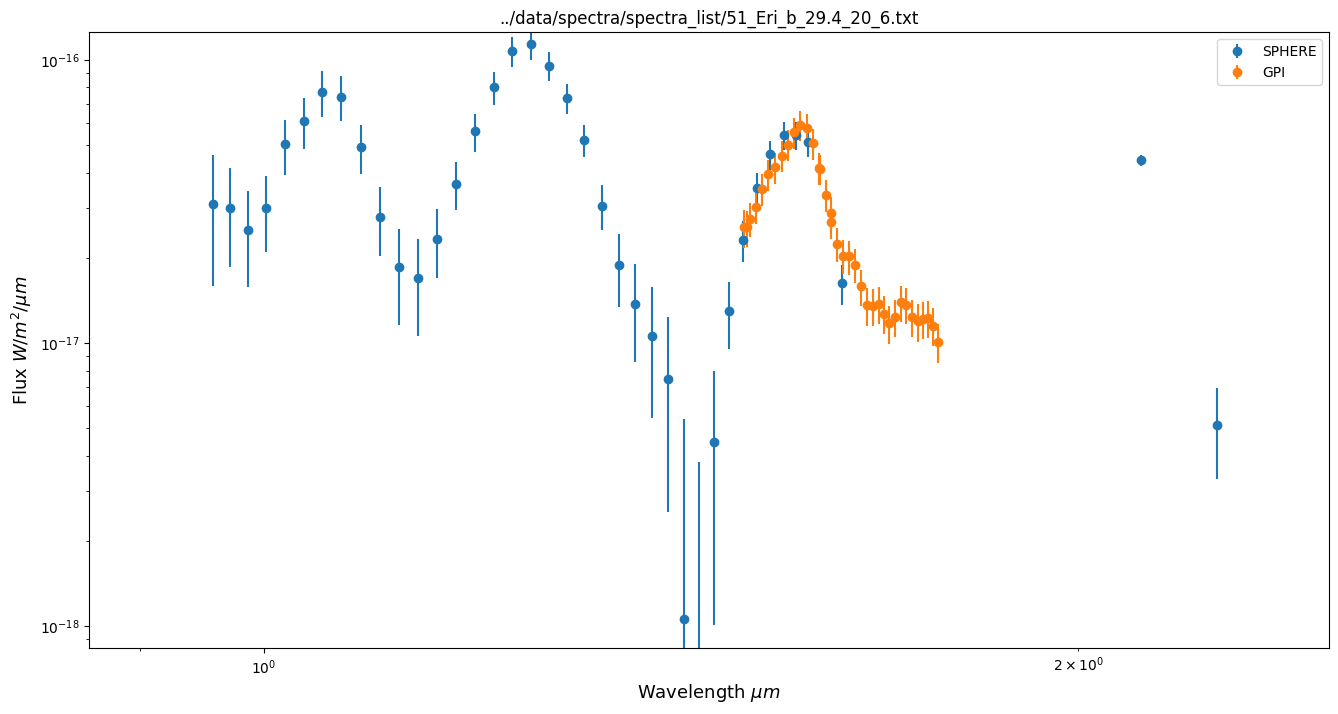

In [10]:
IS = IdentifySpectra(
    planet = 'BPIC_b_2015_10_01_YJ_spectrum_paco_full.txt',
    distance_planet = 39.4)
IS.plot_spectrum()

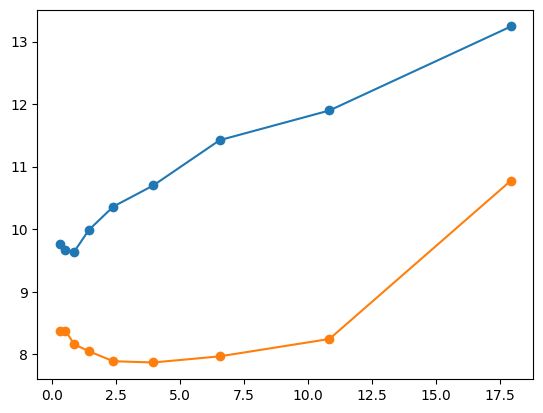

In [47]:
import glob 
init_s = pd.concat([pd.read_csv(file) for file in glob.glob('../data/age_data/*')])

# Define custom mass bins
mass_bins = np.logspace(np.log10(init_s['M'].min()),np.log10(init_s['M'].max()),10)

# Bin the mass column
init_s['M_bin_intervals'] = pd.cut(init_s['M'], bins=mass_bins, right=False)
init_s['M_bin'] = init_s['M_bin_intervals'].apply(lambda x: x.mid)
result = init_s.groupby('M_bin')['S'].agg(['min', 'max']).reset_index()

plt.plot(mass_bins[:-1], result['max'],'-o', label='max')
plt.plot(mass_bins[:-1], result['min'],'-o', label='min')



In [30]:
result['M_bin'].iloc[0].left

np.float64(0.1)

In [51]:
from scipy.interpolate import interp1d
interp1d(result['M_bin'],result['min'])(1)

array(8.23584657)

In [49]:
random.rand

M_bin        min        max
0   0.4250   8.375436   9.768781
1   0.7030   8.377432   9.664318
2   1.1625   8.158380   9.641031
3   1.9225   8.047693   9.988018
4   3.1795   7.888549  10.360115
5   5.2585   7.868191  10.699145
6   8.6965   7.966159  11.422960
7  14.3830   8.244048  11.897743
8  23.7875  10.776793  13.241030